In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import gensim.models.word2vec as w2v
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import os

In [2]:
model = w2v.Word2Vec.load(os.path.join("../model","model.w2v"))

In [3]:
pca = PCA(n_components=2)
all_word_vectors = model.wv.syn0
all_word_vectors_2d = pca.fit_transform(all_word_vectors)

C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


In [4]:
data  = pd.DataFrame(
    [
        (word,coords[0],coords[1])
        for word,coords in [
            (word,all_word_vectors_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
        
    ],
    columns=["word", "x", "y"]
    )

data.head()

,word,x,y
0,ink,-0.067974,0.004135
1,helps,-0.069486,0.004189
2,drive,0.160760,-0.015646
3,democracy,0.111041,0.026626
4,in,1.107113,0.039236


In [6]:
sns.set_context("poster")

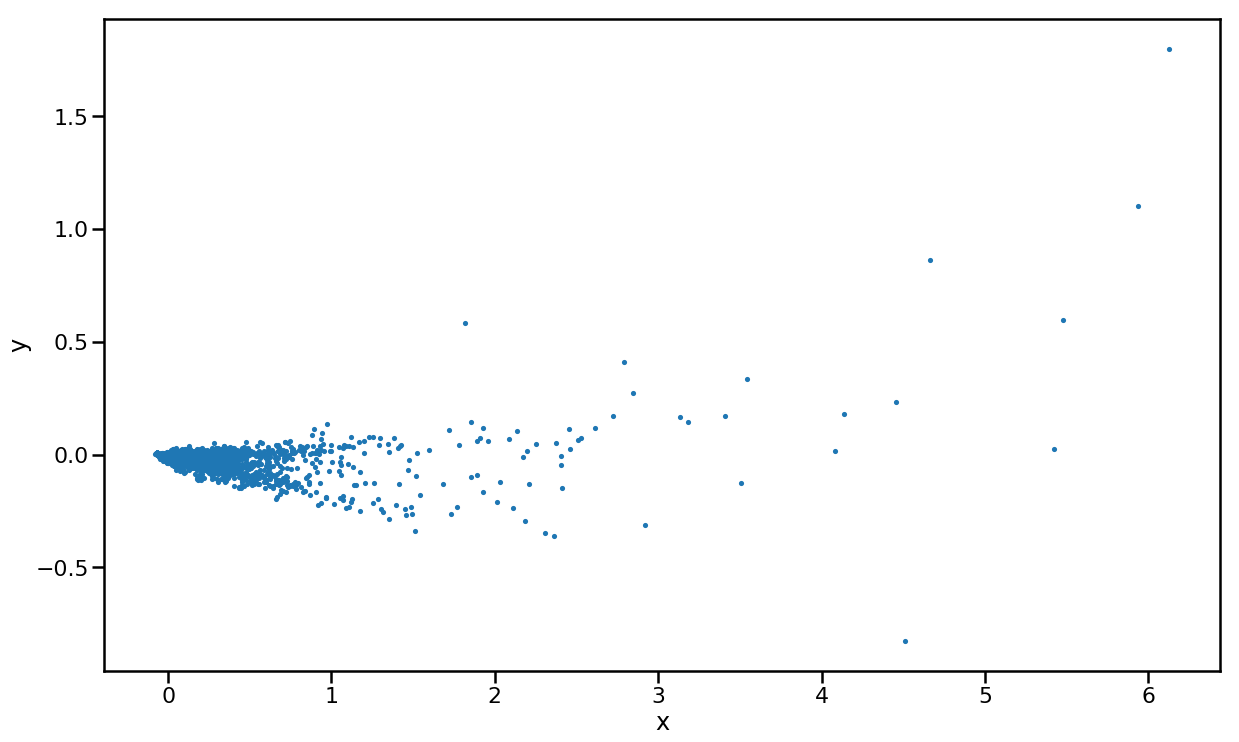

In [7]:
data.plot.scatter("x","y",s=10,figsize=(20,12))

In [8]:
def plot_region(x_bounds,y_bounds):
    slice = data[
        (x_bounds[0] <= data.x) &
        (data.x <= x_bounds[1]) & 
        (y_bounds[0] <= data.y) &
        (data.y <= y_bounds[1])
    ]
#     print slice
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

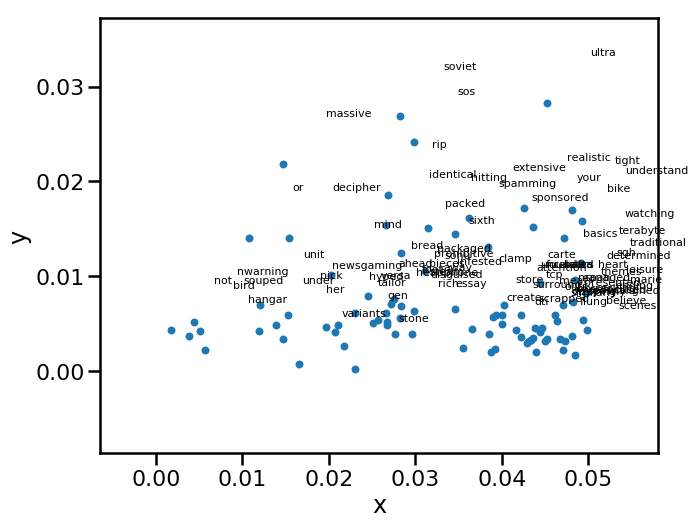

In [9]:
plot_region((0,0.05),(0,0.2))

In [10]:
model.most_similar("school")

C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('long', 0.998469352722168),
 ('h', 0.9984526634216309),
 ('first', 0.9984098672866821),
 ('non', 0.9983906149864197),
 ('re', 0.9983808994293213),
 ('ups', 0.9983792304992676),
 ('of', 0.99836266040802),
 ('like', 0.9983493685722351),
 ('all', 0.9983493089675903),
 ('spanish', 0.9983216524124146)]

In [11]:
model.most_similar("economy")

C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('noone', 0.17441794276237488),
 ('experimental', 0.16333569586277008),
 ('couples', 0.16044345498085022),
 ('speechworks', 0.15546917915344238),
 ('registries', 0.1553269624710083),
 ('cps', 0.15457764267921448),
 ('heineken', 0.15323826670646667),
 ('electrical', 0.15135756134986877),
 ('koogle', 0.14990343153476715),
 ('hardcore', 0.14500562846660614)]

In [13]:
def nearest_similar_cosine(s1,e1,e2):
    similarities = model.most_similar_cosmul(
    positive = [e2,s1],
    negative = [e1])
    
    s2 = similarities[0][0]
    print("%s is related to %s as %s is related to %s"%(s1,e1,s2,e2))
    return(s2)

In [14]:
nearest_similar_cosine("economy", "couples", "potter")

economy is related to couples as affects is related to potter


C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'affects'